#Библиотеки


In [ ]:
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots

#Чтение датасета

In [ ]:
# загружаем набор данных
data = pd.read_csv('yandex_tracks_top100.csv')
data_copy = data.copy()
data_copy.columns = data_copy.columns.str.strip()
data_copy
#Просмотр датафрейма

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523
...,...,...,...,...,...,...,...,...,...
95,Громко играй аппаратура,2:55,https://music.yandex.ru//album/27215517/track/...,кавказская музыка,['Ислам Итляшев'],96,0,2035200,1905638
96,ОГНЕЙ,3:01,https://music.yandex.ru//album/25511786/track/...,русский рэп,['SALUKI'],97,1,2406371,212786
97,Как ты там,2:17,https://music.yandex.ru//album/20907667/track/...,русский рэп,['Kamazz'],98,0,1982259,1164475
98,Bang,2:23,https://music.yandex.ru//album/24583850/track/...,электроника,"['Vitor Bueno', 'Unklfnkl', 'Jetlag Music']",99,0,1493668,14822


In [ ]:
print(data.info())
# вывод краткой информации по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   100 non-null    object
 1   track_len              100 non-null    object
 2   link                   100 non-null    object
 3   genre                  100 non-null    object
 4   artist(s)              100 non-null    object
 5   chart                  100 non-null    int64 
 6   Explicit_content       100 non-null    int64 
 7   monthly_listens_total  100 non-null    int64 
 8   artists_likes_total    100 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.2+ KB
None


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
chart,100.0,50.50,2.901149e+01,1.0,25.75,50.5,75.25,100.0
Explicit_content,100.0,0.22,4.163332e-01,0.0,0.00,0.0,0.00,1.0
monthly_listens_total,100.0,4054830.85,2.654050e+06,0.0,2363362.75,3582027.0,4847753.00,16677658.0
artists_likes_total,100.0,1660508.68,1.832553e+06,0.0,112934.00,972807.5,2409955.75,8379202.0


In [ ]:
data[data['artists_likes_total'] < 5]

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
43,Космос,3:47,https://music.yandex.ru//album/11999153/track/...,русский рэп,[],44,0,0,0


#Изменение формата датасета

In [ ]:
data = data.drop(index=[43])
# удаляем трек с 0.0 прослушиваний и лайков, чтобы не мешал при анализе

In [ ]:
data = data.rename(columns = {'artist(s)':'artists'})
data.artists = data.artists.str[1:-1]
data['artists'] = data['artists'].replace({"$^'|'":' '}, regex=True)
# меняем формат имен артистов
data.head()

,name,track_len,link,genre,artists,chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,ANNA ASTI,1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"Винтаж , ТРАВМА , SKIDRI , DVRKLXGHT",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,A.V.G,3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,MACAN,4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"Кравц , Гио Пика",5,0,9058111,1509523


In [ ]:
def sec_convert(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds
data['track_len'] = data['track_len'].apply(sec_convert)
data

,name,track_len,link,genre,artists,chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,215,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,ANNA ASTI,1,0,4847753,2120528
1,Плохая Девочка,135,https://music.yandex.ru//album/26697445/track/...,русский рэп,"Винтаж , ТРАВМА , SKIDRI , DVRKLXGHT",2,0,16677658,417013
2,Я плачу,114,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,A.V.G,3,0,4406023,287295
3,ASPHALT 8,135,https://music.yandex.ru//album/25361122/track/...,русский рэп,MACAN,4,0,5149399,2359899
4,Где прошла ты,168,https://music.yandex.ru//album/25163882/track/...,русский рэп,"Кравц , Гио Пика",5,0,9058111,1509523
...,...,...,...,...,...,...,...,...,...
95,Громко играй аппаратура,175,https://music.yandex.ru//album/27215517/track/...,кавказская музыка,Ислам Итляшев,96,0,2035200,1905638
96,ОГНЕЙ,181,https://music.yandex.ru//album/25511786/track/...,русский рэп,SALUKI,97,1,2406371,212786
97,Как ты там,137,https://music.yandex.ru//album/20907667/track/...,русский рэп,Kamazz,98,0,1982259,1164475
98,Bang,143,https://music.yandex.ru//album/24583850/track/...,электроника,"Vitor Bueno , Unklfnkl , Jetlag Music",99,0,1493668,14822


#Анализ популярности жанров в чарте

In [ ]:
print(data['genre'].unique())
# просмотр различных жанров музыки, представленных в датасете

['русская поп-музыка' 'русский рэп' 'панк' 'русский рок' 'поп' 'гиперпоп'
 'электроника' 'индастриал' 'хаус' 'кавказская музыка']


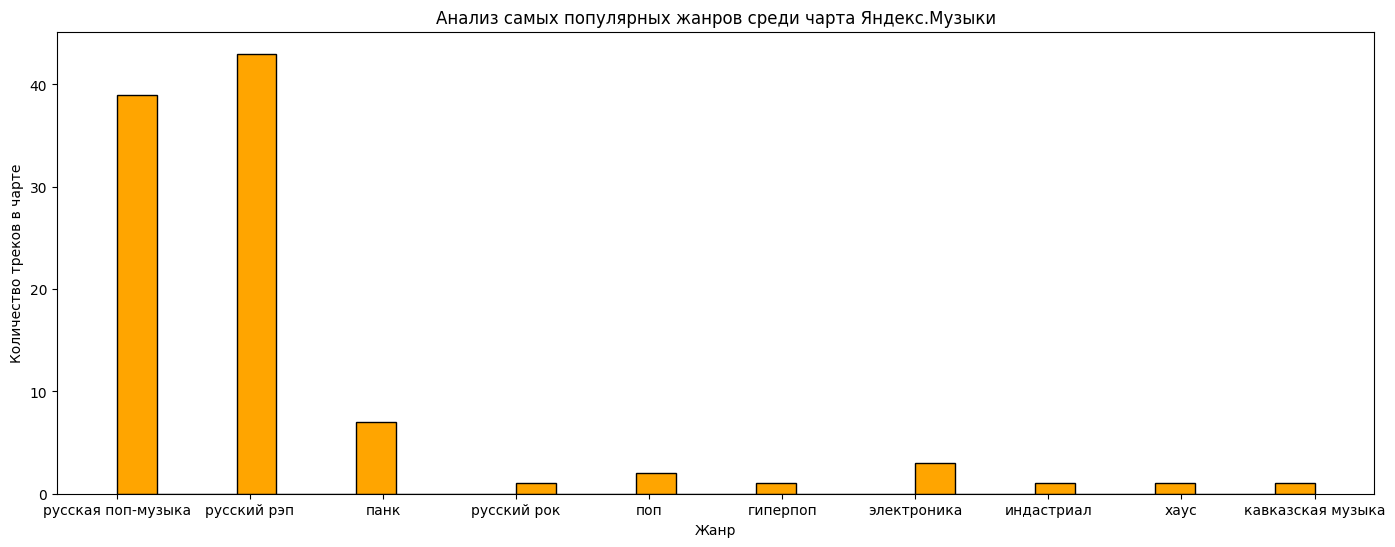

русский рэп           43
русская поп-музыка    39
панк                   7
электроника            3
поп                    2
русский рок            1
гиперпоп               1
индастриал             1
хаус                   1
кавказская музыка      1
Name: genre, dtype: int64

In [ ]:
plt.figure(figsize=(17, 6))
plt.hist(data['genre'], bins=30, color='orange', edgecolor='black')
plt.title('Анализ самых популярных жанров среди чарта Яндекс.Музыки')
plt.xlabel('Жанр')
plt.ylabel('Количество треков в чарте')
plt.show()
top_genre = data['genre'].value_counts()
top_genre

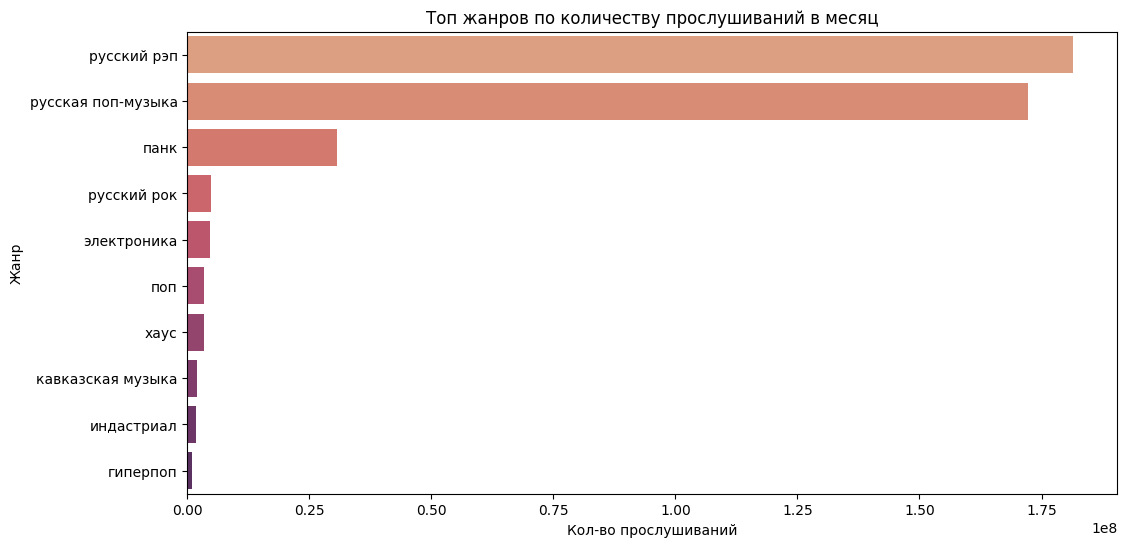

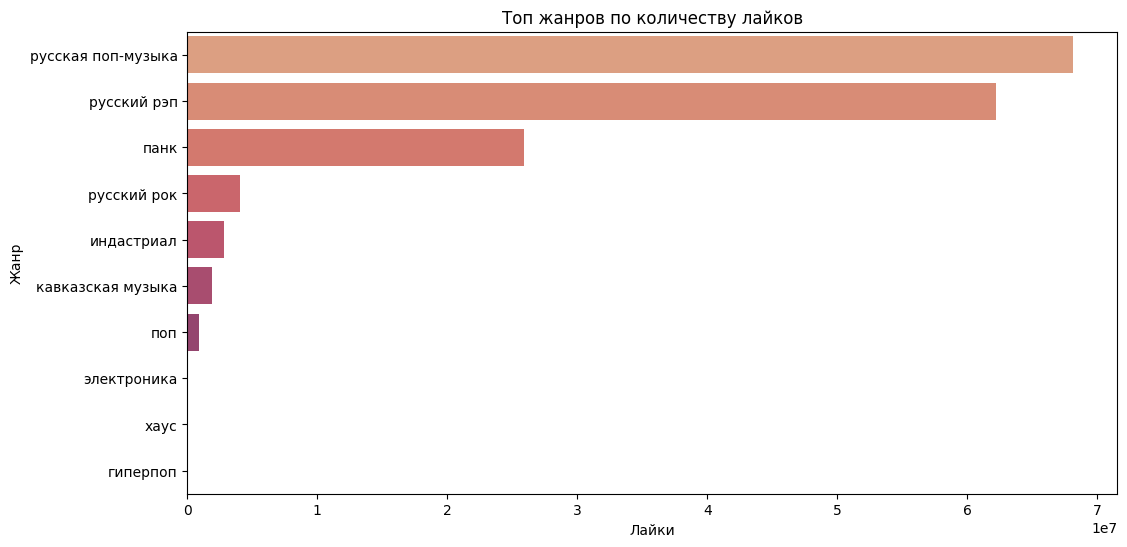

In [ ]:
grpd = data.groupby('genre')

agg_functions = {
    'monthly_listens_total': 'sum',
    'artists_likes_total': 'sum'
}

genre_s = grpd.agg(agg_functions)
genre_lis = genre_s['monthly_listens_total'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_lis.values, y=genre_lis.index, palette='flare')
plt.xlabel('Кол-во прослушиваний')
plt.ylabel('Жанр')
plt.title('Топ жанров по количеству прослушиваний в месяц')
plt.show()

genre_lik = genre_s['artists_likes_total'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_lik.values, y=genre_lik.index, palette='flare')
plt.xlabel('Лайки')
plt.ylabel('Жанр')
plt.title('Топ жанров по количеству лайков')
plt.show()

#Топ популярных треков по лайкам и прослушиваниям за месяц


<Axes: title={'center': 'Самые популярные представители чарта по лайкам артистов'}>

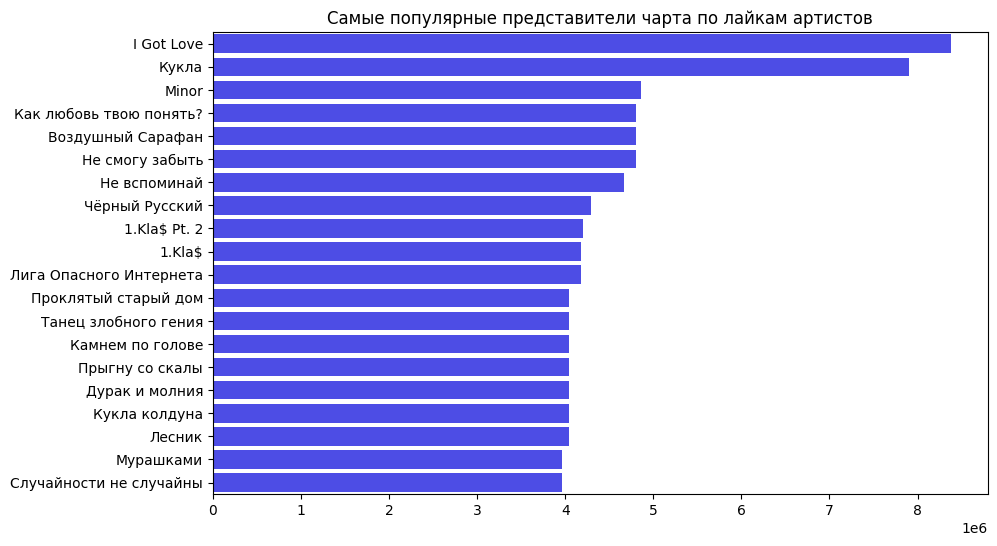

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Самые популярные представители чарта по лайкам артистов')
sns.barplot(y=data[['name', 'artists_likes_total']].sort_values('artists_likes_total', ascending = False).head(20).name.values,
            x=data[['name', 'artists_likes_total']].sort_values('artists_likes_total', ascending = False).head(20).artists_likes_total.values,
            alpha = 0.8, color = 'Blue')

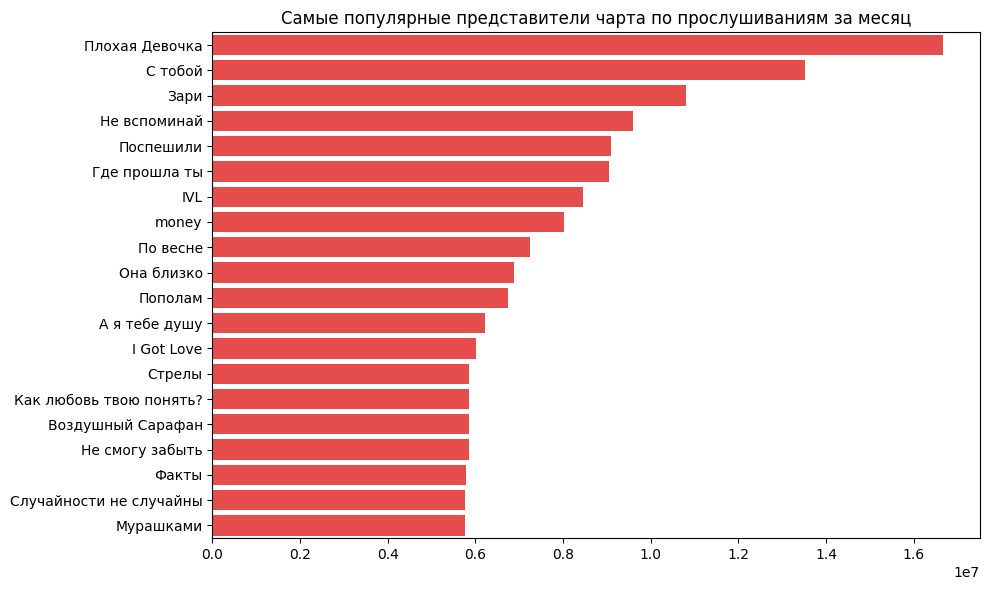

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(y=data[['name', 'monthly_listens_total']].sort_values('monthly_listens_total', ascending = False).head(20).name.values,
            x=data[['artists', 'monthly_listens_total']].sort_values('monthly_listens_total', ascending = False).head(20).monthly_listens_total.values,
            alpha = 0.8, color = 'Red')

plt.title('Самые популярные представители чарта по прослушиваниям за месяц')
plt.tight_layout()
plt.show()

#Просмотр популярности треков в зависимости от их длительности

<Axes: ylabel='Density'>

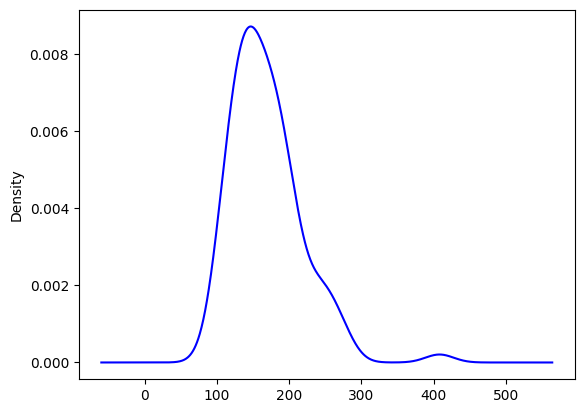

In [ ]:
data['track_len'].plot(kind='kde', color = 'Blue')
#Просмотр плотности распределения значений длительности треков

In [ ]:
import plotly.graph_objects as go
plt = px.scatter(x=data['monthly_listens_total'], y=data['track_len'], color_discrete_sequence=['Blue'])
plt.update_layout(template='simple_white',
                    showlegend=False,
                    xaxis = {'title':'Прослушиваний'},
                    yaxis = {'title':'Длительность'})

plt.show()

In [ ]:
import plotly.graph_objects as go
plt = px.scatter(x=data['artists_likes_total'], y=data['track_len'], color_discrete_sequence=['Blue'])
plt.update_layout(template='simple_white',
                    showlegend=False,
                    xaxis = {'title':'Лайков'},
                    yaxis = {'title':'Длительность'})

plt.show()

<Axes: xlabel='chart'>

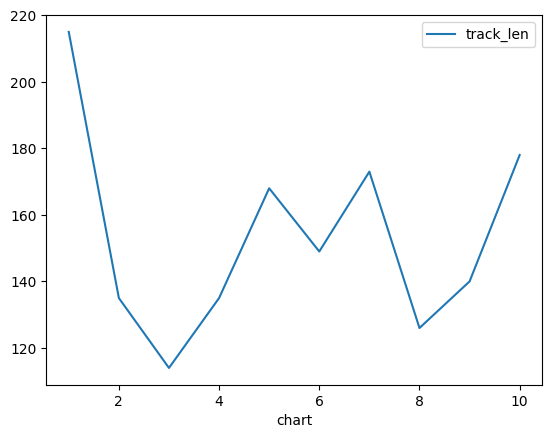

In [ ]:
data.head(10).plot(y = 'track_len', x = 'chart')

#Распределение треков с 18+ меткой и без

In [ ]:

df_explict = data['Explicit_content'].value_counts()

plt.add_trace(go.Pie(values=df_explict,
                       labels=['Без ограничений', '18+'],
                       textinfo='label',
                       insidetextorientation='auto',
                       marker=dict(colors=['Orange','#fd5956'],
                                   line_color='Black',
                                   line_width=1),
                       textfont={'color': '#000000', 'size': 16},
                       textfont_size=12))

plt.update_layout(margin_t=60,
                    showlegend=True,
                    title_text='Ограниченный и неограниченный контент', )
plt.show()

In [ ]:
data_corr = data.copy()
d_c = data_corr.drop(columns = ['name','track_len','link','genre','artists','chart'])
d_c.corr(method='pearson', min_periods=1, numeric_only=False)

,Explicit_content,monthly_listens_total,artists_likes_total
Explicit_content,1.000000,-0.279800,-0.000532
monthly_listens_total,-0.279800,1.000000,0.256404
artists_likes_total,-0.000532,0.256404,1.000000


#Сколько коллабораций


In [ ]:
k = data['artists'].unique()
n = ''
for x in k:
  n += x
print(n.count(','), 'артист поучаствовал в коллаборациях.', (n.count(' ') + 1 - n.count(',')*2)//2, 'артистов всего в чарте.')

41 артист поучаствовал в коллаборациях. 119 артистов всего в чарте.


#Самый часто-встречающийся артист (без участия в коллаборациях)

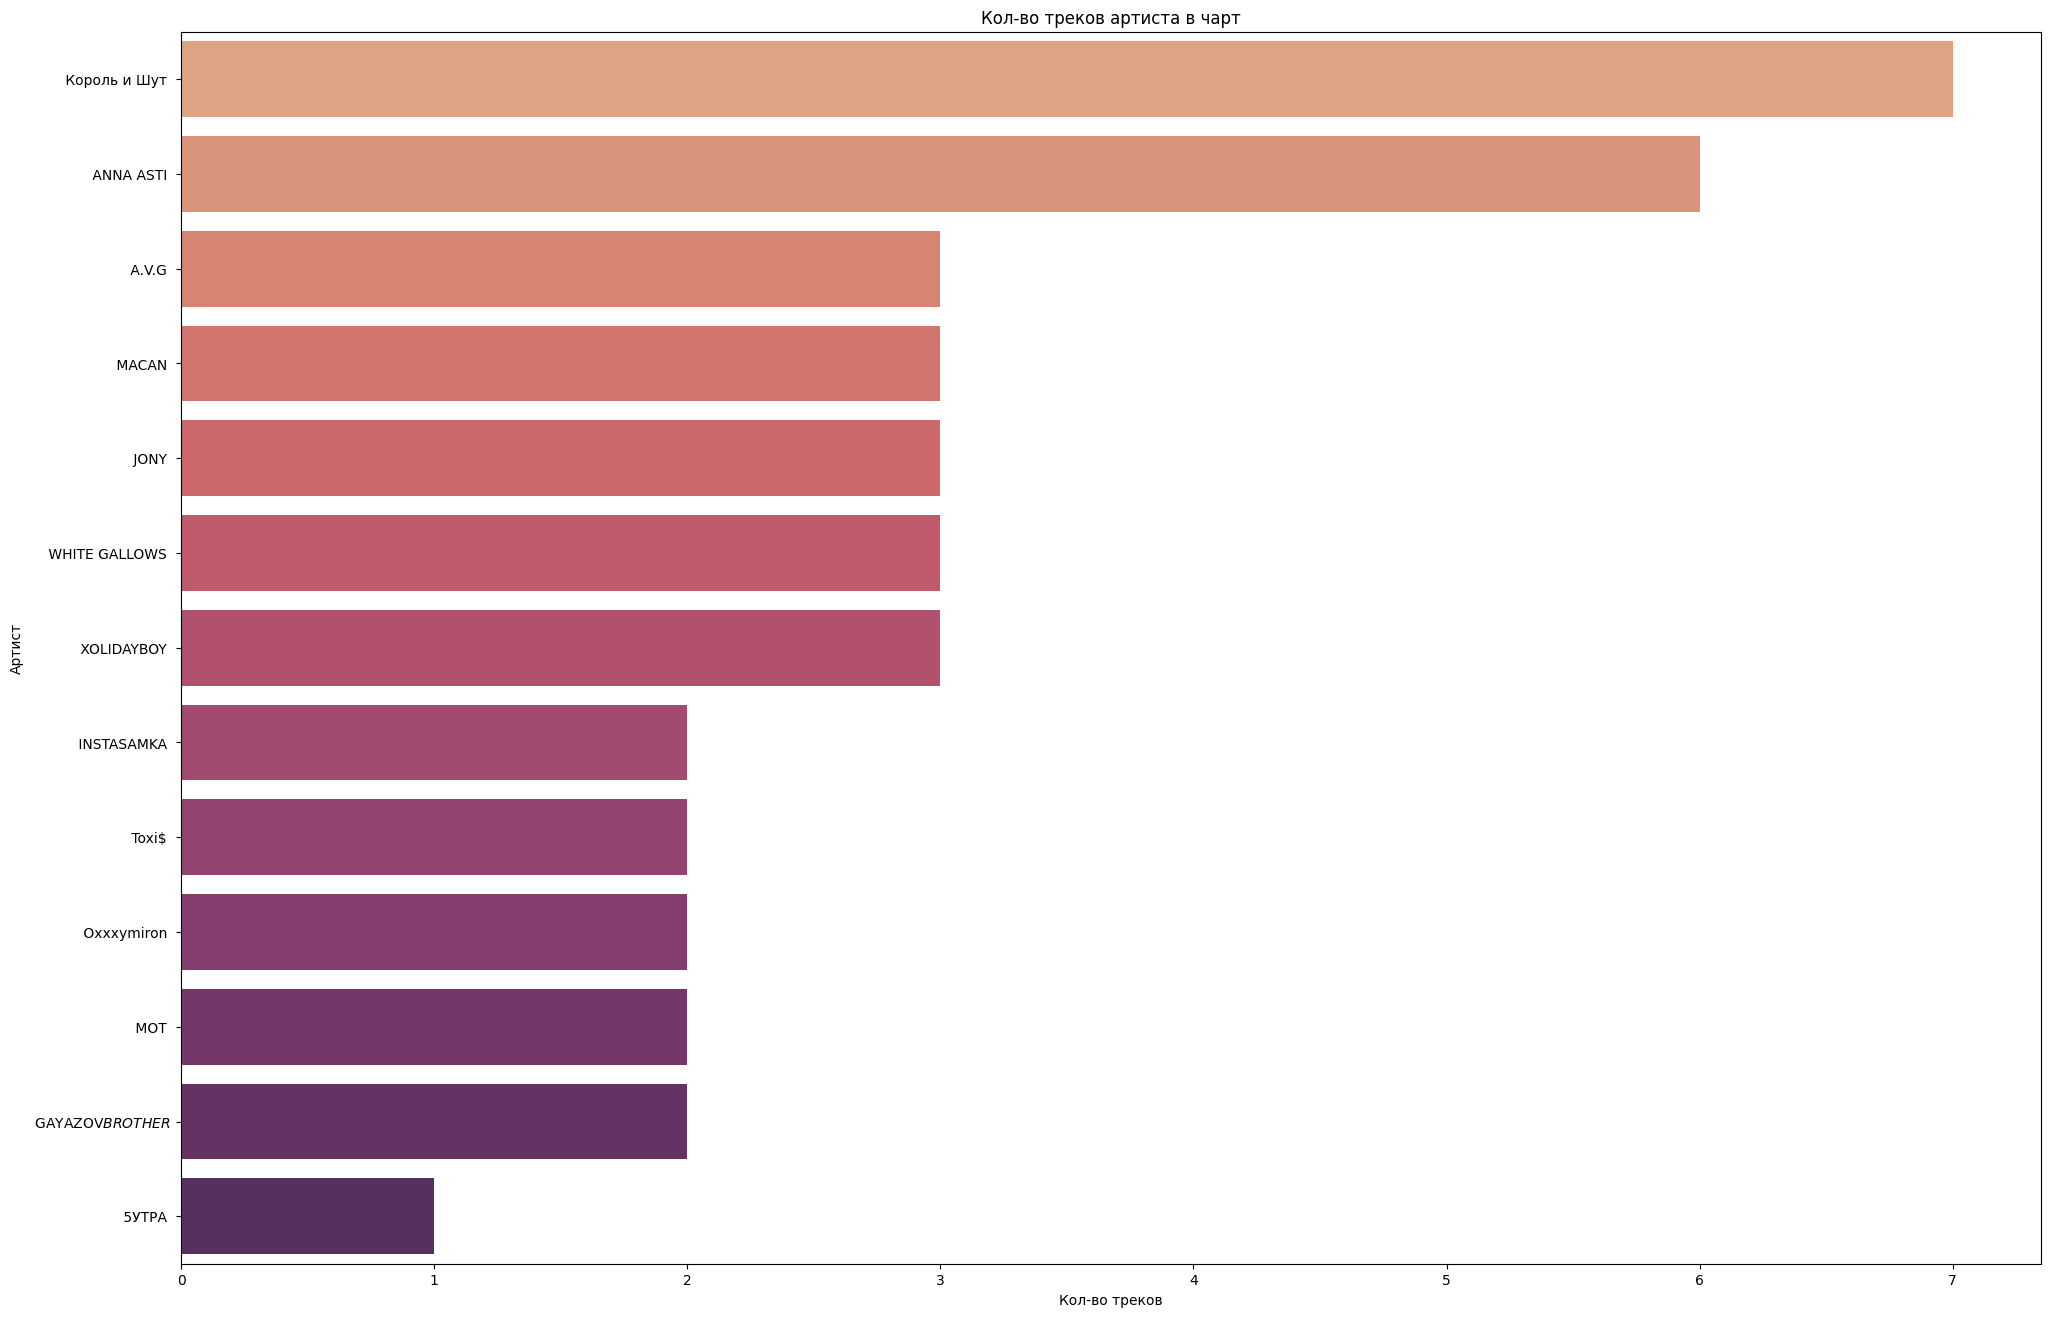

In [ ]:
kei = data['artists'].value_counts().head(13)
plt.figure(figsize=(24, 16))
sns.barplot(x=kei.values, y=kei.index, palette='flare')
plt.xlabel('Кол-во треков')
plt.ylabel('Артист')
plt.title('Кол-во треков артиста в чарт')
plt.show()